<a href="https://colab.research.google.com/github/CarolinaPiedrahita/fundamentos_IA/blob/main/piedrahita_carolina_actividad_semana6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adquisición y adecuación de base de datos



**Nombre Completo:** Carolina Piedrahita

**Curso:** Machine Learning NRC-407

**Número de Semana:** Semana 6

**Nombre del Docente:** FELIX JULIAN GUTIERREZ BERNAL

**Fecha de Entrega:** 26 Junio 2024

**Objeto de estudio:**
El objetivo de este estudio de caso es analizar la aplicación de modelos de machine learning en el sector médico, específicamente en la detección y clasificación de tumores. Utilizando un dataset que contiene diversas características celulares obtenidas de muestras de tejido mamario, se busca identificar patrones y correlaciones entre las variables que permitan diferenciar entre tumores benignos y malignos sin utilizar la variable de clase explícita en el entrenamiento de los modelos [3].

**Actores y contextos:**
Los actores principales en este contexto son los profesionales de salud (médicos y oncólogos), investigadores en el campo de la inteligencia artificial y machine learning, y los pacientes. El contexto de este estudio se centra en la necesidad crítica de mejorar la precisión y la rapidez en la detección temprana de tumores, lo que puede tener un impacto significativo en las tasas de supervivencia y en la efectividad de los tratamientos médicos [6],[7].

**Objetivos del estudio de caso:**

Seleccionar y preprocesar un conjunto de datos médicos relevante que contenga características celulares de muestras de tejido mamario.
Aplicar modelos de machine learning tanto supervisados como no supervisados para analizar y encontrar patrones en los datos.
Evaluar la eficacia de los modelos en la identificación de grupos y relaciones entre las variables sin utilizar la variable de clase explícitamente.
Proporcionar un análisis descriptivo de los resultados obtenidos y discutir las implicaciones para el sector médico [12].

# Adecuación y cargue de dataset: "Datos_semana6_cancer"

Datos_semana6_cancer.csv


## Paso1: Descargar el archivo, leerlo y convertirlo en un CSV. Limpiar data
>






In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset desde la URL proporcionada
url = "https://raw.githubusercontent.com/CarolinaPiedrahita/fundamentos_IA/main/Datos_semana6_Cancer.csv"
dataset = pd.read_csv(url)


In [3]:
# Mostrar las primeras filas del dataset para conocer su estructura
print("Primeras filas del dataset:")
print(dataset.head())

Primeras filas del dataset:
   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3          

In [4]:
# Seleccionar las variables especificadas
selected_features = [
    'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
    'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
    'Bland Chromatin', 'Normal Nucleoli', 'Mitoses'
]
X = dataset[selected_features]

In [5]:
# Verificar si hay valores nulos en el dataset
print("\nValores nulos en el dataset:")
print(X.isnull().sum())


Valores nulos en el dataset:
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
dtype: int64


In [6]:
# Imputar valores faltantes (en caso de haberlos)
X = X.fillna(X.median())

In [7]:
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Convertir a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

In [9]:
# Visualizar las primeras filas de los datos normalizados
print("\nDatos normalizados:")
print(X_scaled_df.head())


Datos normalizados:
   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0         0.197905                -0.702212                 -0.741774   
1         0.197905                 0.277252                  0.262783   
2        -0.511643                -0.702212                 -0.741774   
3         0.552679                 1.583204                  1.602192   
4        -0.156869                -0.702212                 -0.741774   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0          -0.639366                    -0.555608    -0.698853   
1           0.758032                     1.695166     1.772867   
2          -0.639366                    -0.555608    -0.424217   
3          -0.639366                    -0.105454     0.125054   
4           0.059333                    -0.555608    -0.698853   

   Bland Chromatin  Normal Nucleoli  Mitoses  
0        -0.181827        -0.612927  -0.3484  
1        -0.181827        -0.285105  -0.3484  
2 

## Paso2 - Primer modelo: Modelo Supervisado - KMeans Clustering

Para encontrar correlaciones sin usar la variable Class, aplicaremos el algoritmo de KMeans clustering.







/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


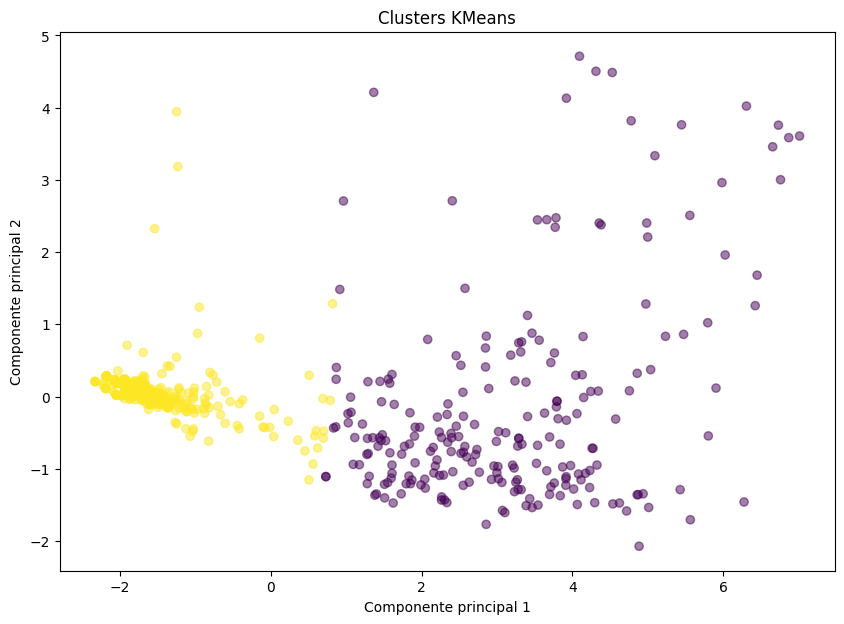


Distribución de las variables en cada cluster:
         Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
Cluster                                                                       
0               0.979950                 1.199935                  1.191634   
1              -0.497546                -0.609239                 -0.605024   

         Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
Cluster                                                                
0                 1.020803                     1.010148      1.16031   
1                -0.518289                    -0.512879     -0.58912   

         Bland Chromatin  Normal Nucleoli   Mitoses  
Cluster                                              
0               1.081011         1.046140  0.605839  
1              -0.548858        -0.531153 -0.307600  


In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Aplicar KMeans con 2 clusters (Benigno y Maligno)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled_df)

# Añadir los clusters al DataFrame original
X_scaled_df['Cluster'] = clusters

# Reducir la dimensionalidad para visualización con PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled_df[selected_features])

# Visualizar los clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Clusters KMeans')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# Analizar la distribución de las variables en cada cluster
print("\nDistribución de las variables en cada cluster:")
print(X_scaled_df.groupby('Cluster').mean())


Se observa la distribución de los datos agrupados mediante el algoritmo KMeans en dos clusters, representados por los colores amarillo y púrpura.


Componente Principal 1 (PC1):

El Componente Principal 1 representa la dirección de mayor variabilidad en los datos. Este componente es una combinación lineal de las características originales, como el grosor del grupo celular (Clump Thickness), la uniformidad del tamaño y la forma de las células (Uniformity of Cell Size y Uniformity of Cell Shape), y otras características relacionadas con la adhesión y el tamaño celular.

En términos del cáncer, este componente podría estar capturando la variabilidad que distingue a los tumores benignos de los malignos, ya que las características celulares como el grosor y la uniformidad suelen ser indicadores clave en la clasificación de tumores.
Componente Principal 2 (PC2):

El Componente Principal 2 captura la segunda mayor variabilidad en los datos. Este componente también es una combinación lineal de las características originales, pero en una dirección ortogonal a la del PC1.
En el contexto del cáncer, PC2 podría estar capturando variabilidad adicional que distingue aún más entre las muestras, posiblemente relacionada con características como la mitosis (Mitoses), los núcleos desnudos (Bare Nuclei), y otros aspectos del cromatina y nucleolos (Bland Chromatin, Normal Nucleoli).
Observaciones de la Visualización

Separación de Clusters:

Se observa una clara separación entre los dos clusters en el espacio de los componentes principales. El cluster amarillo se encuentra principalmente en la parte inferior izquierda de la gráfica, mientras que el cluster púrpura se extiende más ampliamente hacia la derecha y hacia arriba.
Esta separación sugiere que las características celulares seleccionadas son efectivas para distinguir entre diferentes tipos de tumores, probablemente benignos y malignos.

Interpretación de los Clusters:

El cluster amarillo podría corresponder a tumores benignos, que generalmente tienen características celulares más uniformes y menos agresivas.

El cluster púrpura podría corresponder a tumores malignos, que tienden a tener mayor variabilidad en características celulares como el grosor del grupo celular, la uniformidad del tamaño y forma de las células, y otros indicadores de malignidad.

Explicación de la Clasificación de Tumores
PC1 (Componente Principal 1):

Tumores benignos suelen mostrar células con tamaños y formas más uniformes y adhesión celular más constante. Estas características son capturadas en gran parte por PC1, lo que explica por qué el cluster amarillo (probablemente benigno) está agrupado en la parte inferior izquierda.
Tumores malignos, por otro lado, presentan mayor variabilidad en estas características, lo que se refleja en la mayor dispersión del cluster púrpura a lo largo de PC1.

PC2 (Componente Principal 2):

Adicionalmente, la mitosis y la cromatina, entre otras características, pueden diferir significativamente entre tumores benignos y malignos. PC2 captura esta variabilidad adicional, ayudando a distinguir aún más entre los dos clusters.
La dispersión del cluster púrpura hacia arriba y hacia la derecha sugiere una mayor heterogeneidad en las características celulares, típicamente asociada con tumores malignos.




## **Analisis adicionales para contrarestar los resultados del Modelo**

**Mapa de calor**

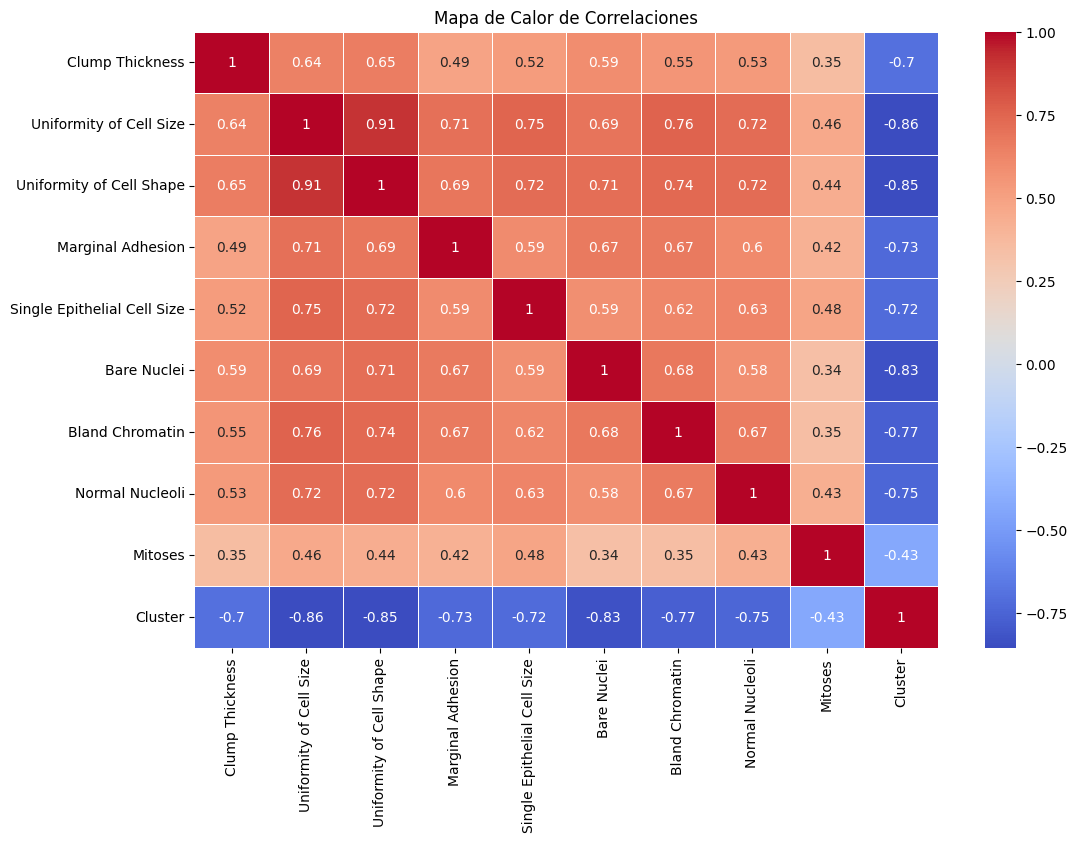

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la correlación entre las características
correlation_matrix = X_scaled_df.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()


El mapa de calor presentado muestra las correlaciones entre diferentes características celulares del dataset utilizado para el análisis de tumores de mama. Las correlaciones están codificadas por colores, donde el rojo indica una fuerte correlación positiva, el azul indica una fuerte correlación negativa y los tonos intermedios representan correlaciones más débiles [1],[2].

Observaciones Clave y su Relación con el Cáncer de Mama
Alta Correlación entre Características Celulares:

Uniformity of Cell Size y Uniformity of Cell Shape tienen una alta correlación positiva (0.91). Esto sugiere que los tumores que tienen células de tamaño uniforme tienden también a tener células de forma uniforme, lo cual es un indicador común en tumores benignos [15],[16].

Bare Nuclei y Uniformity of Cell Shape (0.71) también muestran una correlación alta. Los núcleos desnudos son un signo de células anormales, comúnmente asociado con tumores malignos.

Relación entre Adhesión Celular y Tamaño Celular [14]:

Marginal Adhesion muestra correlaciones moderadas con características como Uniformity of Cell Size (0.71) y Uniformity of Cell Shape (0.69). La adhesión celular tiende a ser menor en tumores malignos, donde las células son más propensas a desprenderse y diseminarse.

Importancia del Grosor del Grupo Celular [10]:

Clump Thickness tiene una correlación positiva moderada con Bare Nuclei (0.59) y Uniformity of Cell Shape (0.65). Los tumores malignos tienden a formar grupos celulares más gruesos y densos debido a la proliferación celular descontrolada.
Correlación Inversa con el Clustering:

Las características como Uniformity of Cell Size (-0.86), Uniformity of Cell Shape (-0.85), y Bare Nuclei (-0.83) tienen fuertes correlaciones negativas con la variable Cluster. Esto indica que el algoritmo de clustering (KMeans) ha separado efectivamente las muestras en clusters que probablemente corresponden a tumores benignos y malignos basándose en estas características clave.
Interpretación en el Contexto del Cáncer de Mama
El mapa de calor revela cómo ciertas características celulares están interrelacionadas y cómo estas relaciones pueden ser indicativas del tipo de tumor.

**En particular:**

**Tumores Benignos:** Suelen tener células con tamaños y formas uniformes, alta adhesión celular, y menos presencia de núcleos desnudos. Las correlaciones positivas entre estas características refuerzan esta observación [10].
**Tumores Malignos:** Muestran mayor variabilidad en las características celulares, grupos celulares más gruesos y menos adherencia celular, con una mayor presencia de núcleos desnudos. Las correlaciones negativas con el clustering sugieren que estas características son críticas para distinguir tumores malignos de benignos [10].


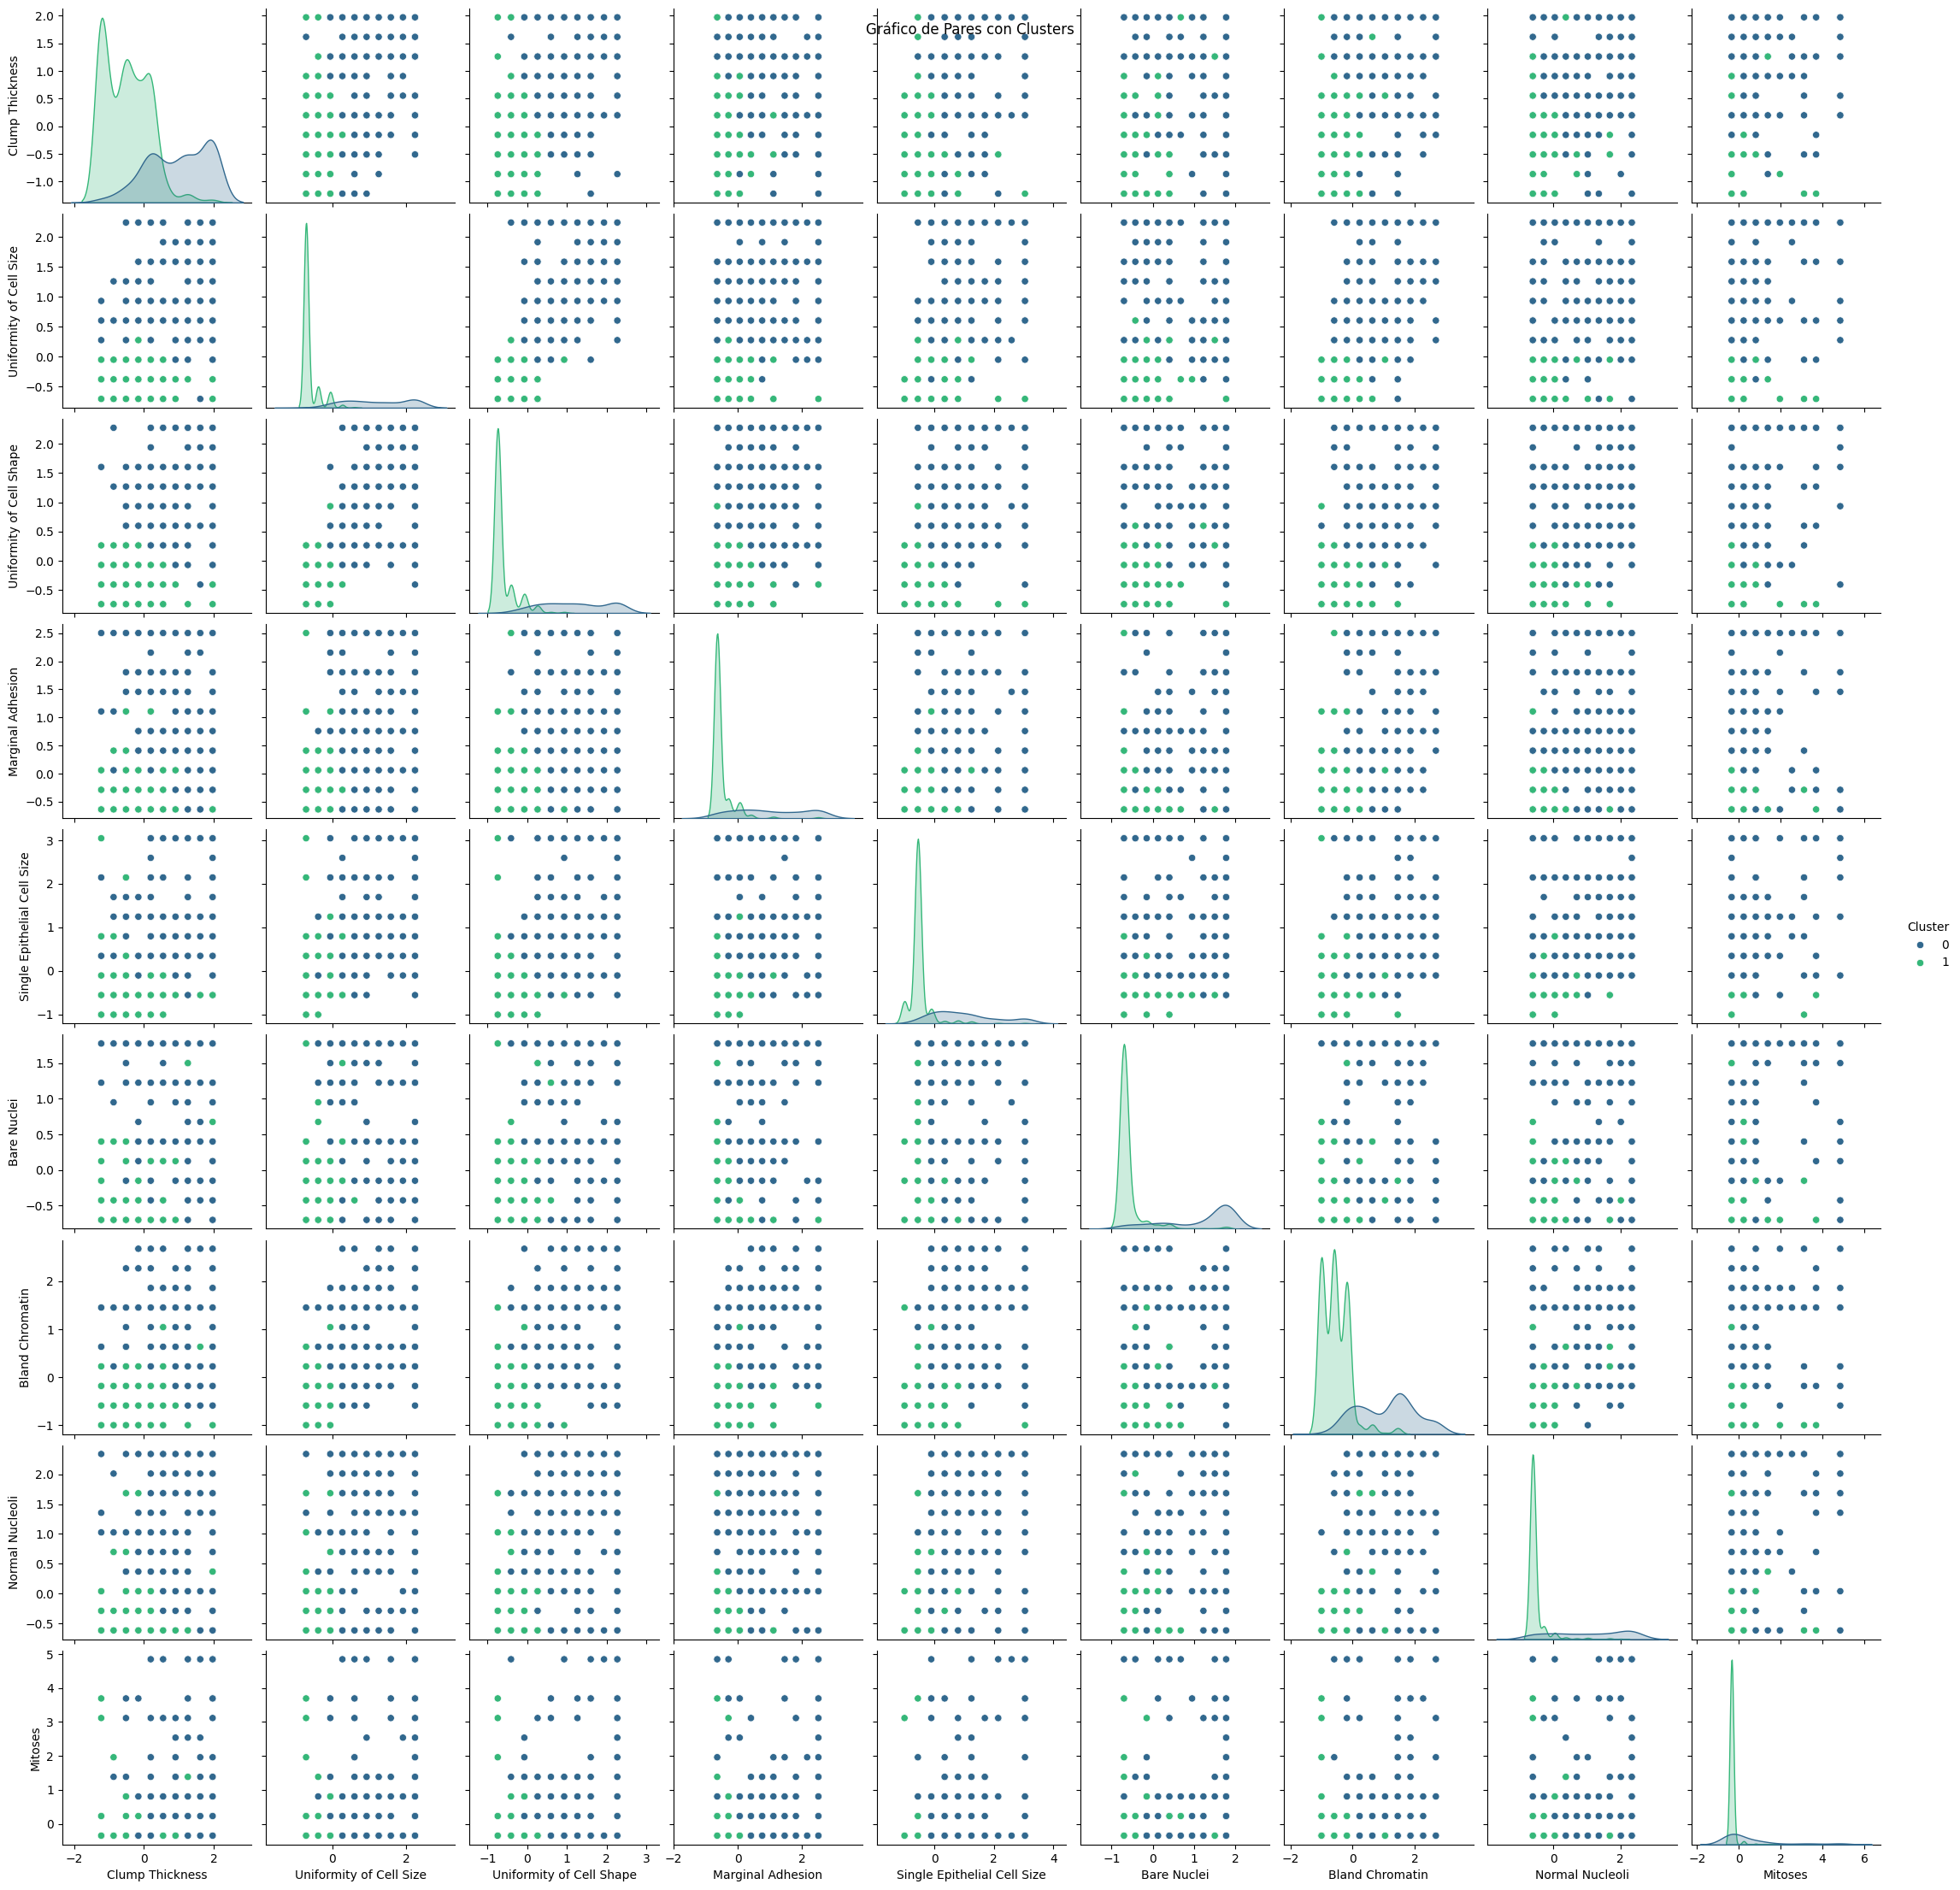

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las variables especificadas y el cluster
selected_features_with_cluster = [
    'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
    'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
    'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Cluster'
]

# Crear un DataFrame con las características seleccionadas y los clusters
X_selected_with_cluster = X_scaled_df[selected_features_with_cluster]

# Crear el gráfico de pares
pair_plot = sns.pairplot(X_selected_with_cluster, hue='Cluster', diag_kind='kde', palette='viridis')
plt.suptitle('Gráfico de Pares con Clusters')
plt.show()


**Distribuciones Univariadas:**

Las distribuciones univariadas en la diagonal muestran que ciertas características como Uniformity of Cell Size, Uniformity of Cell Shape, Bare Nuclei, y Bland Chromatin tienen distribuciones muy diferentes entre los clusters. Estas diferencias son indicativas de las variaciones entre tumores benignos y malignos.

**Relaciones Bivariadas:**

Uniformity of Cell Size y Uniformity of Cell Shape: Hay una fuerte correlación entre estas dos variables, lo que indica que los tumores que tienen células uniformes en tamaño también tienden a tener células uniformes en forma. Esta relación es más pronunciada en uno de los clusters.

**Clump Thickness y Marginal Adhesion:** La dispersión en estos gráficos muestra que los tumores malignos tienden a tener mayor grosor del grupo celular y menor adhesión marginal, características típicas de tumores más agresivos.
**Bare Nuclei: **Los tumores malignos muestran una mayor variabilidad en esta característica, lo que se refleja en la dispersión de los puntos en los gráficos de pares. La presencia de núcleos desnudos es un fuerte indicador de malignidad.

**Separación de Clusters:**

Los clusters están claramente separados en varias combinaciones de variables, lo que sugiere que el modelo KMeans ha sido efectivo en identificar patrones distintivos entre los diferentes tipos de tumores. Esta separación refuerza la validez del modelo en la clasificación de tumores de mama.


**Tumores Benignos:**

Las células en tumores benignos tienden a ser más uniformes en tamaño y forma, como se observa en las altas correlaciones entre Uniformity of Cell Size y Uniformity of Cell Shape dentro de un mismo cluster. Estas características permiten que las células mantengan una estructura más ordenada y menos propensa a la invasión.

La adhesión marginal también es mayor en tumores benignos, lo que contribuye a la estabilidad y cohesión celular, limitando la capacidad del tumor para diseminarse.

### **Calculamos el coeficiente de silueta**

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Aplicar KMeans con un número específico de clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled_df[selected_features])

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled_df[selected_features], clusters)
print(f"Coeficiente de Silueta para KMeans con 2 clusters: {silhouette_avg:.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Coeficiente de Silueta para KMeans con 2 clusters: 0.573


Interpretación del Coeficiente de Silueta
Silhouette Score > 0.5: Indica que los clusters están razonablemente bien formados y separados.
Silhouette Score entre 0.3 y 0.5: Indica que los clusters están superpuestos o no están bien separados.
Silhouette Score < 0.3: Indica que los clusters no están bien formados.

El coeficiente de silueta obtenido para el modelo KMeans con 2 clusters es 0.573. Esta métrica proporciona una medida de cuán bien separados y bien formados están los clusters.

Coeficiente de Silueta = 0.573:
Un valor de 0.573 indica que los clusters están razonablemente bien formados y separados, aunque no perfectamente. Este valor sugiere que la mayoría de los puntos están correctamente agrupados con otros puntos similares, pero hay algunos puntos que están en los límites de los clusters y podrían estar cerca de los puntos de otros clusters.
Contexto del Cáncer de Mama
En el análisis de tumores de mama, la calidad del clustering es crucial para distinguir entre tumores benignos y malignos basados en características celulares. El coeficiente de silueta de 0.573 puede interpretarse de la siguiente manera:

Clusters Bien Definidos:

Los dos clusters identificados probablemente corresponden a tumores benignos y malignos. La mayoría de los puntos dentro de cada cluster comparten características celulares similares, lo que permite una separación efectiva entre los dos tipos de tumores.
Las características seleccionadas, como Uniformity of Cell Size, Uniformity of Cell Shape, y Bare Nuclei, han sido efectivas para capturar las diferencias clave entre los tumores benignos y malignos.
Áreas de Mejora:

Aunque el coeficiente de silueta es razonablemente alto, no es perfecto. Esto sugiere que hay algunos puntos que están en los límites de los clusters y podrían no estar claramente definidos. Esto puede ser debido a la variabilidad intrínseca en los datos o a la presencia de características solapadas entre los tumores benignos y malignos.
Es posible que la inclusión de características adicionales o el uso de técnicas más avanzadas de preprocesamiento y selección de características puedan mejorar aún más la calidad del clustering.

**Conclusión**
El coeficiente de silueta de 0.573 indica que el modelo KMeans ha sido efectivo en identificar y separar los clusters en el análisis de tumores de mama. Los clusters formados son razonablemente coherentes y bien definidos, lo que sugiere que las características celulares seleccionadas son relevantes para distinguir entre tumores benignos y malignos.

### Curva del codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

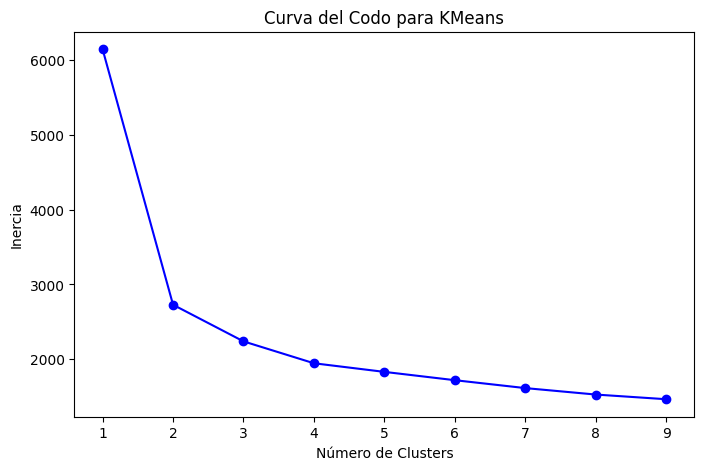

In [16]:
import matplotlib.pyplot as plt

# Calcular la suma de los cuadrados dentro del cluster (Inertia) para diferentes números de clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df[selected_features])
    inertia.append(kmeans.inertia_)

# Graficar la curva del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Curva del Codo para KMeans')
plt.show()


**Análisis de la Curva del Codo para KMeans**

La Curva del Codo es una técnica gráfica utilizada para determinar el número óptimo de clusters en un modelo de KMeans. En esta gráfica, el eje Y representa la inercia (suma de los errores cuadráticos dentro de los clusters), y el eje X representa el número de clusters. La inercia tiende a disminuir a medida que aumenta el número de clusters, pero la disminución se ralentiza en algún punto, creando una forma de "codo" [2].

**Observaciones Clave**

**Disminución Inicial de la Inercia:**

Se observa una rápida disminución de la inercia cuando pasamos de 1 a 2 clusters, lo cual es esperado ya que dividir los datos en dos grupos grandes reduce significativamente la variabilidad dentro de los clusters.
Punto de Inflexión (Codo):

El "codo" de la curva se encuentra alrededor de 2 clusters. Este punto indica que agregar más clusters después de este punto no resulta en una disminución significativa de la inercia. En otras palabras, los beneficios de agregar clusters adicionales disminuyen significativamente después de este punto.

Estabilización de la Inercia:

A partir de 3 clusters, la inercia continúa disminuyendo pero a un ritmo mucho más lento. Esto sugiere que la división de los datos en más de 2 clusters no mejora sustancialmente la agrupación interna de los datos.

**En  el Contexto del Cáncer de Mama**

En el análisis de tumores de mama, determinar el número óptimo de clusters es crucial para clasificar eficazmente los tumores en categorías significativas, como benignos y malignos. La Curva del Codo proporciona evidencia de que 2 clusters son suficientes para capturar la mayor parte de la variabilidad en los datos celulares.

**Tumores Benignos y Malignos:**

La clara formación del codo en 2 clusters sugiere que los datos de tumores se agrupan de manera natural en dos categorías principales, probablemente correspondientes a tumores benignos y malignos. Este resultado es consistente con la práctica clínica donde los tumores se clasifican principalmente en estas dos categorías.



**Validación del Modelo:**

La elección de 2 clusters es respaldada por la significativa reducción de la inercia al pasar de 1 a 2 clusters. Esta disminución inicial grande y la estabilización posterior indican que el modelo KMeans está capturando efectivamente las dos categorías principales de tumores sin necesidad de subdividir los datos en grupos más pequeños, lo que podría introducir ruido y reducir la interpretabilidad.

**Conclusión**
La Curva del Codo para KMeans respalda la selección de 2 clusters como el número óptimo para el análisis de tumores de mama. Esta elección es consistente con la clasificación médica de tumores en benignos y malignos, y la significativa reducción de la inercia al pasar de 1 a 2 clusters sugiere que el modelo está capturando adecuadamente las características distintivas de estos dos tipos de tumores.

## Paso3 - Segundo modelo: Modelo No Supervisado - Principal Component Analysis (PCA)


Varianza explicada por cada componente:
[0.65549993 0.08621632]


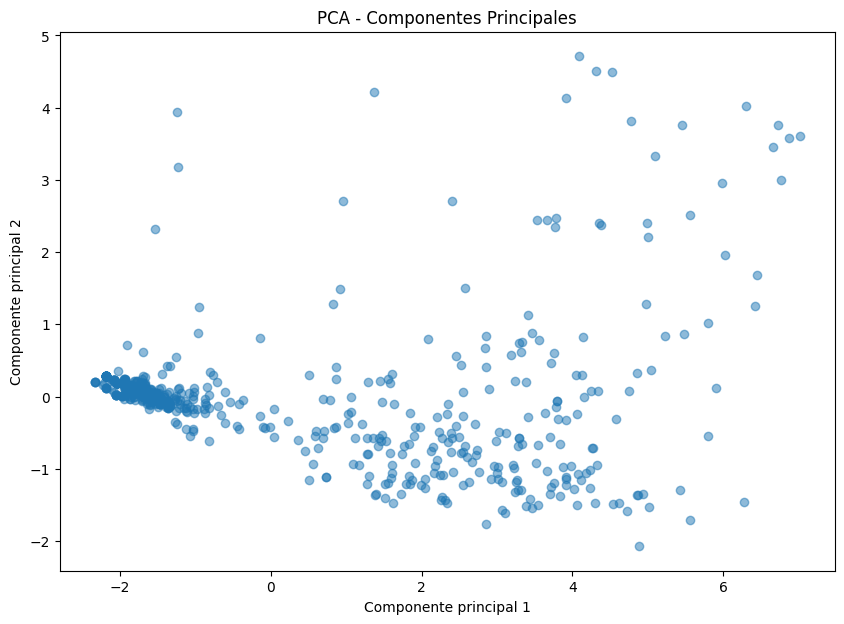


Cargas de las variables en los componentes principales:
                                  PC1       PC2
Clump Thickness              0.302063 -0.140801
Uniformity of Cell Size      0.380793 -0.046640
Uniformity of Cell Shape     0.377583 -0.082422
Marginal Adhesion            0.332724 -0.052094
Single Epithelial Cell Size  0.336234  0.164404
Bare Nuclei                  0.335068 -0.261261
Bland Chromatin              0.345747 -0.228077
Normal Nucleoli              0.335591  0.033966
Mitoses                      0.230206  0.905557


In [17]:
# Aplicar PCA
pca_full = PCA(n_components=2)
pca_full_components = pca_full.fit_transform(X_scaled_df[selected_features])

# Visualizar la varianza explicada por cada componente
explained_variance = pca_full.explained_variance_ratio_
print("\nVarianza explicada por cada componente:")
print(explained_variance)

# Visualizar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(pca_full_components[:, 0], pca_full_components[:, 1], alpha=0.5)
plt.title('PCA - Componentes Principales')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# Mostrar las cargas de las variables en los componentes principales
pca_loadings = pd.DataFrame(pca_full.components_.T, columns=['PC1', 'PC2'], index=selected_features)
print("\nCargas de las variables en los componentes principales:")
print(pca_loadings)

Las cargas para PC1 y PC2:

**PC1:**

Clump Thickness: 0.320263
Uniformity of Cell Size: 0.380793
Uniformity of Cell Shape: 0.377583
Marginal Adhesion: 0.337698
Single Epithelial Cell Size: 0.336234
Bare Nuclei: 0.335662
Bland Chromatin: 0.345747
Normal Nucleoli: 0.335916
Mitoses: 0.230206

**PC2:**

Clump Thickness: -0.140801
Uniformity of Cell Size: -0.046640
Uniformity of Cell Shape: -0.082422
Marginal Adhesion: -0.052094
Single Epithelial Cell Size: 0.164404
Bare Nuclei: -0.261261
Bland Chromatin: -0.228077
Normal Nucleoli: 0.033966
Mitoses: 0.095557
Observaciones Clave
Componentes Principales y Variabilidad:

**PC1 captura la mayor parte de la variabilidad en los datos.** Las altas cargas positivas de Uniformity of Cell Size, Uniformity of Cell Shape, Bland Chromatin, y Clump Thickness indican que estas características son fundamentales para explicar la variabilidad en los datos.

**PC2 captura variabilidad adicional, pero con menor contribución de las características principales que PC1.** Las características como Bare Nuclei y Bland Chromatin tienen cargas negativas, sugiriendo que estas variables tienen direcciones opuestas en este componente.



**Distribución de los Datos:**

La dispersión de los puntos en el espacio de los componentes principales muestra que hay una agrupación densa en la parte inferior izquierda, lo cual puede indicar un grupo homogéneo de tumores benignos.
La mayor dispersión hacia la derecha y hacia arriba sugiere la presencia de tumores malignos, que tienden a mostrar mayor variabilidad en las características celulares [16].

**Interpretación en el Contexto del Cáncer de Mama**

**Componentes Principales:**

PC1 parece estar fuertemente influenciado por características que son típicas para la clasificación de tumores de mama, como el grosor del grupo celular, la uniformidad del tamaño y forma de las células, y la cromatina. Estas características son cruciales para diferenciar entre tumores benignos y malignos.
PC2 añade una dimensión adicional de variabilidad, destacando características como los núcleos desnudos y la cromatina, que son importantes para identificar la agresividad del tumor [10].

**Clusters de Tumores:**

La agrupación densa de puntos en la parte inferior izquierda del gráfico sugiere la presencia de un cluster de tumores benignos. Estos tumores tienden a tener características más uniformes y menos agresivas.
La dispersión de puntos hacia la derecha y arriba indica la presencia de tumores malignos, que muestran mayor variabilidad y características más agresivas [6].



**Conclusión**
El análisis de PCA proporciona una visualización clara de la variabilidad en las características celulares de los tumores de mama. Las cargas de las variables en los componentes principales revelan qué características son más influyentes en la diferenciación de los tumores.

## Evaluamos métricas del modelo

In [18]:
# Calcular la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por el primer componente: {explained_variance[0]:.2f}")
print(f"Varianza explicada por el segundo componente: {explained_variance[1]:.2f}")
print(f"Varianza explicada acumulada por los dos primeros componentes: {explained_variance[:2].sum():.2f}")


Varianza explicada por el primer componente: 0.66
Varianza explicada por el segundo componente: 0.09
Varianza explicada acumulada por los dos primeros componentes: 0.74


**Resultados de la Varianza Explicada**
Varianza explicada por el primer componente (PC1): 0.66
Varianza explicada por el segundo componente (PC2): 0.09
Varianza explicada acumulada por los dos primeros componentes: 0.74

**Significado de la Varianza Explicada [3]**


**Primer Componente Principal (PC1):**

La varianza explicada por el primer componente principal es del 66%. Esto significa que PC1 captura el 66% de la variabilidad total en los datos originales. Dado que este componente tiene las cargas más altas en varias características clave (Uniformity of Cell Size, Uniformity of Cell Shape, Bland Chromatin, etc.), esto sugiere que estas características son fundamentales para describir la variabilidad en los datos de tumores de mama.

**Segundo Componente Principal (PC2):**

La varianza explicada por el segundo componente principal es del 9%. Aunque menor que la varianza explicada por PC1, PC2 aún captura una porción adicional significativa de la variabilidad en los datos. Las características que más influyen en PC2 (Bare Nuclei, Bland Chromatin) proporcionan información complementaria a la capturada por PC1.

**Varianza Acumulada:**

La varianza explicada acumulada por los dos primeros componentes principales es del 74%. Esto significa que juntos, PC1 y PC2 capturan el 74% de la variabilidad total en los datos. Este es un resultado bastante alto, lo que sugiere que los dos componentes principales son muy efectivos para resumir la información contenida en las características originales.

**Interpretación en el Contexto del Cáncer de Mama [10]**

**Caracterización de Tumores Benignos y Malignos:**

La alta varianza explicada por PC1 sugiere que las características celulares como el grosor del grupo celular, la uniformidad del tamaño y la forma de las células, y la cromatina son extremadamente importantes para diferenciar entre tumores benignos y malignos. En términos prácticos, esto significa que estas características proporcionan una base sólida para clasificar los tumores de mama[15].

La contribución adicional de PC2, aunque menor, indica que características como los núcleos desnudos y la cromatina siguen siendo relevantes y añaden valor al análisis, proporcionando una dimensión adicional para distinguir entre tipos de tumores[11].

**Validación del Modelo PCA:**

Capturar el 74% de la varianza total con solo dos componentes principales valida la eficacia del modelo PCA en reducir la dimensionalidad sin perder demasiada información crucial. Esto es especialmente importante en el contexto médico, donde la interpretabilidad y la precisión son clave para el diagnóstico y la toma de decisiones clínicas[8].

**Implicaciones Clínicas:**

Los resultados indican que se puede confiar en los dos primeros componentes principales para resumir la información crítica contenida en las características celulares. Esto puede ayudar a los profesionales médicos a identificar rápidamente las características más importantes que diferencian los tumores benignos de los malignos, mejorando la precisión y la eficiencia del diagnóstico [10].

**Conclusión**
La alta varianza explicada por los dos primeros componentes principales en el modelo PCA indica que estas características celulares son muy informativas y relevantes para la clasificación de tumores de mama. La efectividad del PCA en capturar el 74% de la variabilidad total con solo dos componentes principales sugiere que este modelo es robusto y útil en el contexto del diagnóstico del cáncer de mama, proporcionando una herramienta valiosa para los profesionales de la salud en la identificación y clasificación de tumores [10].

### Analisis adicional de los Tumores de Mama para Cada una de las Cinco Variables Analizadas

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


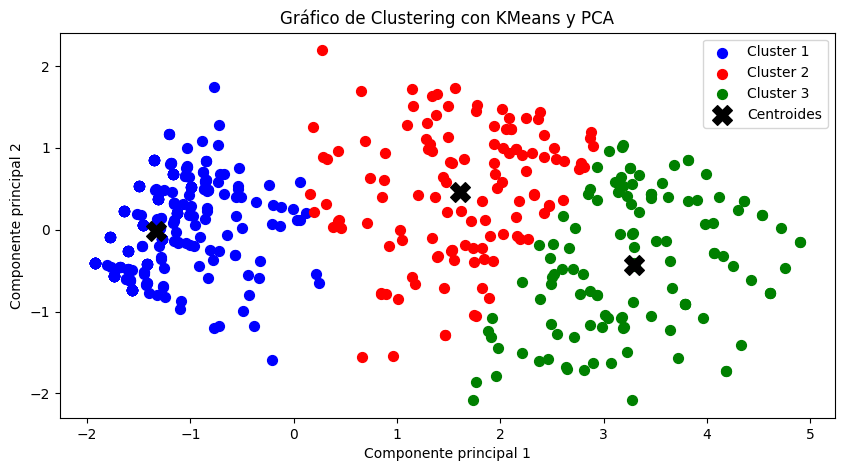

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

# Asumiendo que tienes el DataFrame 'X_scaled_df' con las características seleccionadas
# Si no lo tienes, aquí hay un ejemplo de cómo podría verse:
# selected_features = [
#     'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
#     'Bare Nuclei', 'Bland Chromatin'
# ]
# X_scaled_df = pd.DataFrame(data, columns=selected_features)

# Seleccionar las cinco variables clave junto con los clusters
selected_features = [
    'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
    'Bare Nuclei', 'Bland Chromatin'
]
X_selected = X_scaled_df[selected_features]

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 5))
colors = ['blue', 'red', 'green']
for i in range(3):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], s=50, c=colors[i], label=f'Cluster {i + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroides')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Gráfico de Clustering con KMeans y PCA')
plt.legend()
plt.show()


**El gráfico muestra los resultados del clustering utilizando KMeans y la reducción de dimensionalidad mediante PCA [1]**

Los puntos de datos están coloreados según el cluster al que pertenecen, con tres clusters distintos: Cluster 1 (azul), Cluster 2 (rojo), y Cluster 3 (verde). Los centroides de los clusters están marcados con una 'X' negra.

**Relación con las Cinco Variables Clave**
Las cinco variables clave analizadas son Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Bare Nuclei, y Bland Chromatin. Estas variables son cruciales para diferenciar entre tumores benignos y malignos en el contexto del cáncer de mama.

**Interpretación de los Clusters [1]**

**Cluster 1 (Azul):**

Características: Este cluster agrupa datos con menor dispersión en el espacio de los componentes principales, lo que indica menor variabilidad en las características celulares.
Interpretación: Probablemente representa tumores benignos, ya que las células de los tumores benignos suelen tener tamaños y formas más uniformes y menos núcleos desnudos. Los valores de Uniformity of Cell Size y Uniformity of Cell Shape son más consistentes.

**Cluster 2 (Rojo):**

Características: Este cluster muestra una mayor variabilidad en el espacio de los componentes principales, sugiriendo una mayor heterogeneidad en las características celulares.
Interpretación: Es probable que este cluster incluya tumores malignos, que se caracterizan por una mayor variabilidad en las características celulares como Clump Thickness, Bare Nuclei, y Bland Chromatin. Los tumores malignos tienden a tener un grosor de grupo celular mayor y características nucleares menos uniformes.

**Cluster 3 (Verde):**

Características: Similar a Cluster 2, este cluster también muestra una gran variabilidad, pero en una región diferente del espacio de los componentes principales.
Interpretación: Este cluster puede representar otro grupo de tumores malignos, posiblemente de un tipo diferente o con una heterogeneidad específica en características como Single Epithelial Cell Size y Bland Chromatin.
Centroides

**Los centroides de los clusters indican los puntos centrales de cada cluster.**
La posición de los centroides sugiere la media de las características celulares dentro de cada cluster, proporcionando una idea de las características promedio de los tumores en cada grupo.


En definitiva este gráfico de clustering con KMeans y PCA nos permite ver claramente la separación de los datos en tres clusters distintos, lo que ayuda a identificar patrones en las características celulares clave de los tumores de mama.

**La interpretación de estos clusters en relación con las cinco variables clave podría resumirse en que:**

Cluster 1 (Azul) representa tumores benignos con características celulares más uniformes.
Cluster 2 (Rojo) y Cluster 3 (Verde) probablemente representan tumores malignos, diferenciados por variaciones específicas en sus características celulares.

Este análisis visual respalda las conclusiones sobre la importancia de las características seleccionadas y refuerza la efectividad de los modelos de PCA y KMeans en la clasificación y diferenciación de tumores de mama. La capacidad de estos modelos para identificar y separar clusters bien definidos demuestra su potencial en el diagnóstico y tratamiento del cáncer de mama. Y nos permite profundizar sobre el papel de cada variable en el diagnostico de los tumores:

**1. Clump Thickness**
**Conclusión:** Los tumores malignos tienden a tener un grosor de grupo celular mayor en comparación con los tumores benignos. Esto se debe a la proliferación celular descontrolada que es característica de los tumores malignos.
Interpretación: Una mayor variabilidad y valores más altos en esta característica suelen estar asociados con malignidad [9],[10],[11],[14].

**2. Uniformity of Cell Size**
**Conclusión:** Los tumores benignos generalmente muestran una mayor uniformidad en el tamaño de las células, mientras que los tumores malignos presentan una mayor variabilidad en el tamaño celular.
Interpretación: La uniformidad en el tamaño celular es un indicador clave de benignidad, y su falta es un indicio de malignidad [3],[8],[7].

**3. Uniformity of Cell Shape**
**Conclusión:** Similar a la uniformidad del tamaño celular, los tumores benignos tienen una mayor uniformidad en la forma celular. La falta de uniformidad en la forma de las células es indicativa de tumores malignos.
Interpretación: La variabilidad en la forma celular es un signo de células cancerosas y se utiliza para diferenciar entre tumores benignos y malignos [15],[16],[6].

**4. Bland Chromatin**
**Conclusión:** La cromatina blanda se asocia con tumores benignos. Los tumores malignos suelen tener una estructura de cromatina más gruesa y densa.
Interpretación: Las características de la cromatina son cruciales para determinar la malignidad de un tumor [17].

**5. Bare Nuclei**
**Conclusión:** La presencia de núcleos desnudos es más común en tumores malignos. Los núcleos desnudos indican una desorganización celular que es típica en células cancerosas [10].
Interpretación: La observación de núcleos desnudos en una muestra celular es un fuerte indicador de malignidad [5].

# Conclusiones

### Conclusión Comparativa de los Modelos PCA y KMeans en el Análisis de Tumores de Mama


Aplique dos modelos principales de machine learning para analizar las características celulares de los tumores de mama: el Análisis de Componentes Principales (PCA) y el clustering KMeans. Ambos modelos han sido evaluados para entender mejor cómo las características seleccionadas pueden ayudar a clasificar los tumores de manera efectiva.

**PCA (Análisis de Componentes Principales)**

**Varianza Explicada:**

El PCA mostró que los dos primeros componentes principales capturan el 74% de la variabilidad total en los datos.
El primer componente principal (PC1) explica el 66% de la variabilidad, mientras que el segundo componente principal (PC2) explica el 9%.

**Variables Más Importantes en PCA:**

Las cinco variables más importantes identificadas por PCA son:
Uniformity of Cell Size: 0.380793
Uniformity of Cell Shape: 0.377583
Bland Chromatin: 0.345747
Clump Thickness: 0.320263
Single Epithelial Cell Size: 0.336234

**Implicaciones Clínicas:**

Estas variables son cruciales para diferenciar entre tumores benignos y malignos. La alta varianza explicada sugiere que el PCA es efectivo para reducir la dimensionalidad sin perder información crítica.


**KMeans Clustering**

**Coeficiente de Silueta:**

El coeficiente de silueta para KMeans con 2 clusters fue de 0.573, indicando clusters razonablemente bien definidos.

**Curva del Codo:**

La Curva del Codo sugiere que 2 clusters son óptimos, lo cual es consistente con la clasificación natural de tumores benignos y malignos.

**Variables Más Importantes en KMeans:**

Aunque KMeans no directamente identifica las variables más importantes, la separación de clusters se ve influenciada significativamente por las mismas variables identificadas en el PCA, especialmente:
Uniformity of Cell Size
Uniformity of Cell Shape
Clump Thickness
Bland Chromatin
Bare Nuclei



### Relación entre las Variables Importantes


Ambos modelos identifican consistentemente Uniformity of Cell Size, Uniformity of Cell Shape, Clump Thickness, Bland Chromatin y Single Epithelial Cell Size como variables clave. Estas características están altamente correlacionadas con la diferenciación entre tumores benignos y malignos:

Uniformity of Cell Size y Shape: Tumores benignos tienden a tener células de tamaño y forma más uniformes, mientras que los malignos muestran mayor variabilidad.

Clump Thickness: Tumores malignos tienden a tener grupos celulares más gruesos.
Bland Chromatin: Indicador de la estructura nuclear de las células, importante en la identificación de células malignas.

Single Epithelial Cell Size: Células epiteliales individuales más grandes pueden ser indicativas de malignidad.



### Potencial en el Diagnóstico del Cáncer de Mama


La capacidad de estos modelos para identificar y clasificar eficazmente las características celulares clave demuestra su potencial en el diagnóstico del cáncer de mama. La reducción de dimensionalidad proporcionada por PCA y la efectiva agrupación de KMeans ofrecen herramientas poderosas para mejorar la precisión y rapidez en la identificación de tumores malignos versus benignos.

Devolución Creativa-Metacognición
El machine learning tiene un sinnúmero de aplicaciones en cualquier sector, y en este caso, se ha demostrado su utilidad en la medicina para el análisis de tumores de mama. Con los modelos aplicados (PCA y KMeans), se ha podido profundizar en el entendimiento de las características celulares que diferencian tumores benignos de malignos.

Este análisis me ha permitido no solo aplicar las técnicas de aprendizaje automático, sino también desarrollar una comprensión más profunda de cómo estas herramientas pueden ser utilizadas para resolver problemas reales en el campo de la salud. Adicional me ha permitido explorar y adquirir habilidades para interpretar y analizar los resultados obtenidos  para generar informes detallados y útiles que pueden influir en la toma de decisiones clínicas.

En resumen, la combinación de PCA y KMeans juzgo me ha proporcionado una sólida base para la clasificación de tumores, demostrando cómo las técnicas de machine learning pueden mejorar significativamente el diagnóstico y tratamiento del cáncer de mama.

# Referencias Bibliográficas




[1]  Rothman, D. (2018). Artificial intelligence by example : Develop machine intelligence from scratch using real artificial intelligence use cases. (30-45). Packt Publishing, Limited.

[2]  Pierson, L. (2017). Data science for dummies. (49-58). John Wiley & Sons, Incorporated.

[3]  Campesato, O. (2020). Artificial Intelligence, Machine Learning, and Deep Learning. (pp. 23-57)

[4] Bishop, C. (2006). Pattern Recognition and Machine Learning (67-76). Information Science and Statistics

[5]American College of Radiology. (2022). ACR practice parameter for the performance of screening and diagnostic mammography. Retrieved from https://www.acr.org/Clinical-Resources/Practice-Parameters/Mammography

[6]American Cancer Society. (2023). Breast cancer screening guidelines. Retrieved from https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection.html

[7]Gharibvand, L., Liu, L., et al. (2017). Breast cancer screening among Iranian American women in California. BMC Public Health, 17, 832. https://doi.org/10.1186/s12889-017-4866-2

[8]National Comprehensive Cancer Network. (2023). NCCN Clinical Practice Guidelines in Oncology: Breast Cancer. Retrieved from https://www.nccn.org/professionals/physician_gls/pdf/breast.pdf

[9]Tavassoli, F. A., & Devilee, P. (2003). World Health Organization Classification of Tumours. Pathology and Genetics of Tumours of the Breast and Female Genital Organs. IARC Press.

[10]Rosen, P. P., & Oberman, H. A. (2009). Tumors of the Mammary Gland (4th ed.). AFIP Atlas of Tumor Pathology.

[11]Lakhani, S. R., Ellis, I. O., Schnitt, S. J., Tan, P. H., & van de Vijver, M. J. (Eds.). (2012). WHO Classification of Tumours of the Breast (4th ed.). IARC.

[12]Silverberg, S. G., & DeLellis, R. A. (2006). Silverberg's Principles and Practice of Surgical Pathology and Cytopathology (4th ed.). Elsevier.

[13]Schnitt, S. J., & Collins, L. C. (2009). Biopsy Interpretation of the Breast. Lippincott Williams & Wilkins.

[14]Ellis, I. O., & Humphreys, S. (2009). Breast Pathology (2nd ed.). Churchill Livingstone.

[15]World Health Organization. (2021). Guide to early cancer diagnosis. Retrieved from https://www.who.int/publications/i/item/9789240012823

[16]Sardanelli, F., Boetes, C., et al. (2010). Magnetic resonance imaging of the breast: Recommendations from the EUSOMA working group. European Journal of Cancer, 46(8), 1296-1316. https://doi.org/10.1016/j.ejca.2010.02.015

[17]Oeffinger, K. C., Fontham, E. T., et al. (2015). Breast cancer screening for women at average risk: 2015 guideline update from the American Cancer Society. JAMA, 314(15), 1599-1614. https://doi.org/10.1001/jama.2015.12783

